In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler

# For time stamps
from datetime import datetime
#from keras.models import Sequential



In [2]:


tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = DataReader(stock, data_source='yahoo', start=start, end=end)

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-02-02,3101.500000,2977.270020,3101.010010,3012.250000,4366500.0,3012.250000,AMAZON
2022-02-03,2884.949951,2766.659912,2834.750000,2776.909912,11276600.0,2776.909912,AMAZON
2022-02-04,3224.000000,3012.159912,3112.129883,3152.790039,12640500.0,3152.790039,AMAZON
2022-02-07,3253.820068,3145.000000,3170.399902,3158.709961,5131200.0,3158.709961,AMAZON
2022-02-08,3235.850098,3111.010010,3135.010010,3228.270020,3802000.0,3228.270020,AMAZON
2022-02-09,3276.689941,3205.000000,3257.469971,3223.790039,3439300.0,3223.790039,AMAZON
2022-02-10,3214.330078,3155.000000,3167.000000,3180.070068,3413400.0,3180.070068,AMAZON
2022-02-11,3180.000000,3054.679932,3162.689941,3065.870117,3851600.0,3065.870117,AMAZON
2022-02-14,3168.969971,3033.000000,3035.020020,3103.340088,4022000.0,3103.340088,AMAZON


In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,146.875394,143.903740,145.332284,145.447874,8.975486e+07,144.984806
std,17.525574,17.007550,17.208422,17.286048,2.835639e+07,17.464633
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.672493
25%,130.982498,128.902504,130.015003,130.247505,6.920740e+07,129.615726
50%,146.894997,144.540001,145.500000,145.855003,8.525580e+07,145.348312
75%,155.952499,153.079998,154.695000,154.242504,1.054095e+08,153.821747
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-02-16 to 2022-02-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    float64
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


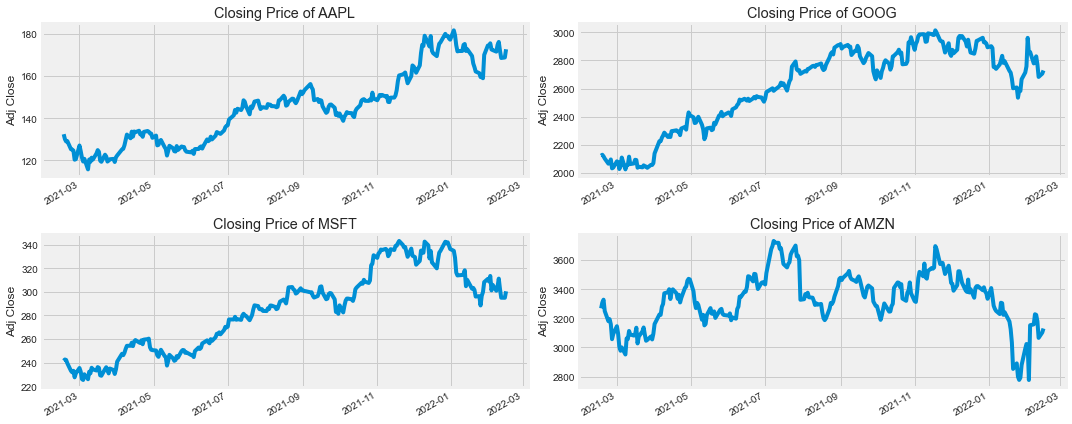

In [6]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

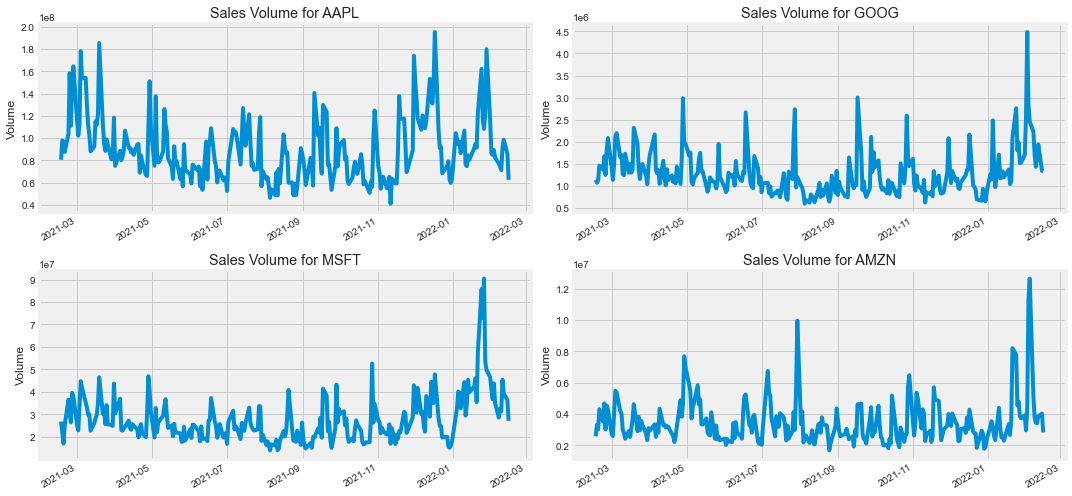

In [7]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

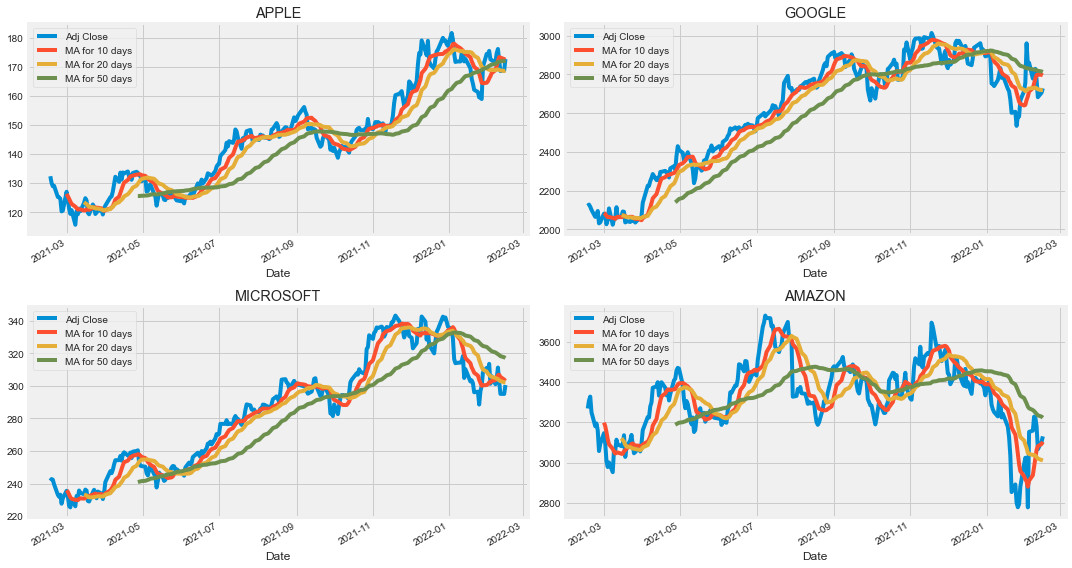

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

D:\anaconda\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

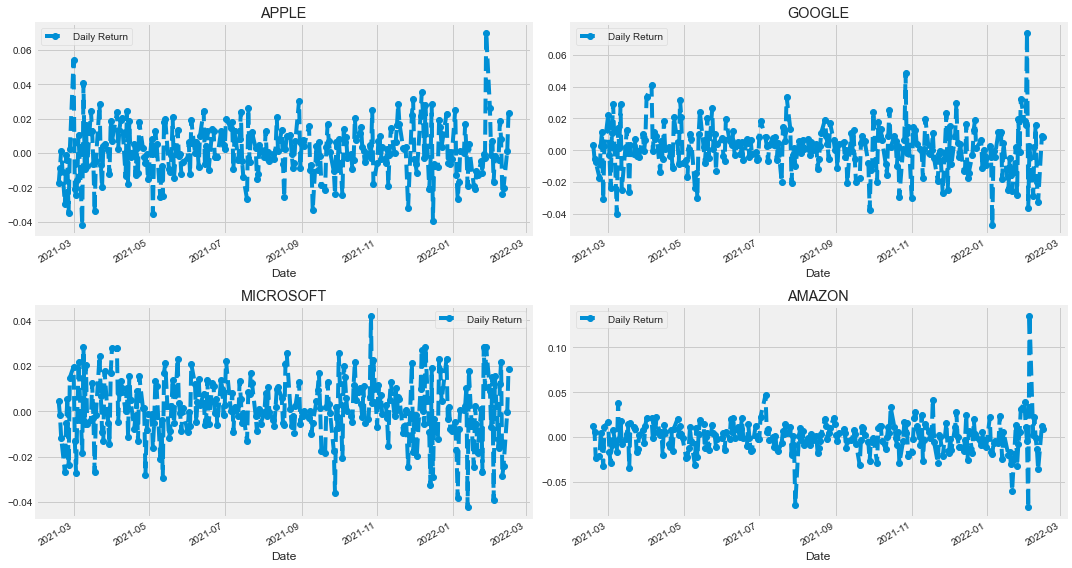

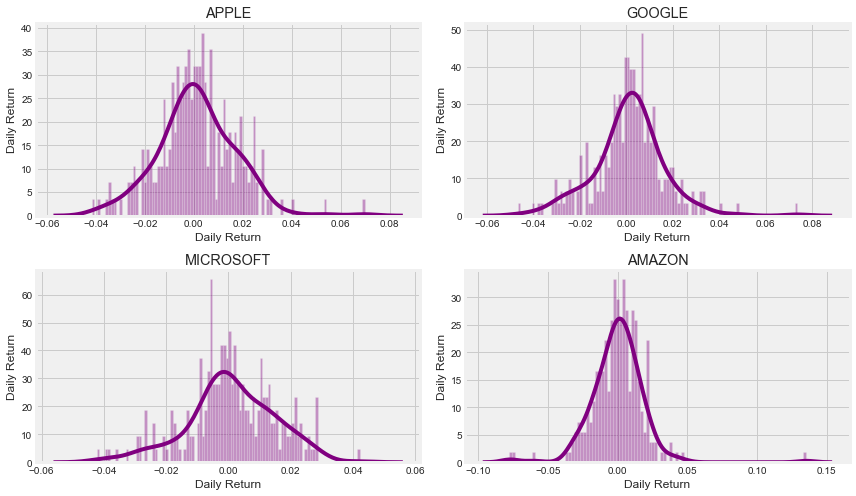

In [10]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

D:\anaconda\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

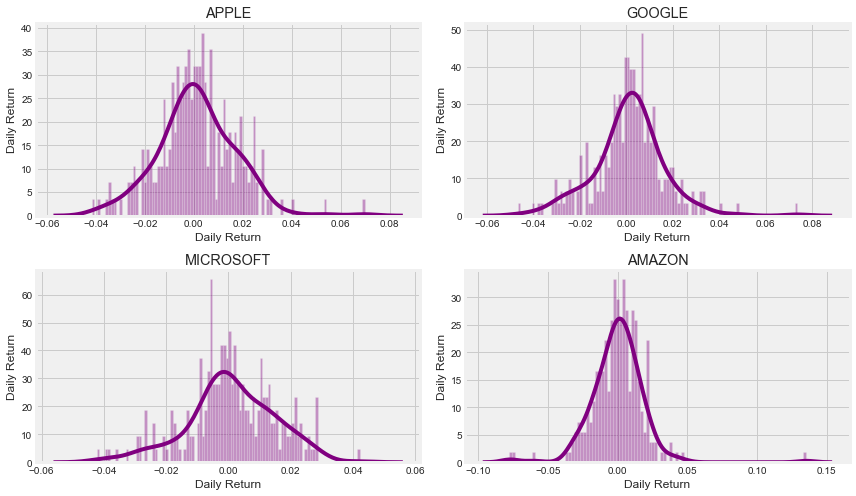

In [11]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-02-16,132.403061,2121.899902,241.674210,3268.949951
2021-02-17,130.066940,2128.310059,242.727829,3308.639893
2021-02-18,128.943634,2117.199951,242.320282,3328.229980
2021-02-19,129.102661,2101.139893,239.517288,3249.899902
2021-02-22,125.255539,2064.879883,233.096237,3180.739990


In [13]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-02-16,NaN,NaN,NaN,NaN
2021-02-17,-0.017644,0.003021,0.004360,0.012141
2021-02-18,-0.008636,-0.005220,-0.001679,0.005921
2021-02-19,0.001233,-0.007586,-0.011567,-0.023535
2021-02-22,-0.029799,-0.017257,-0.026808,-0.021281


D:\anaconda\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


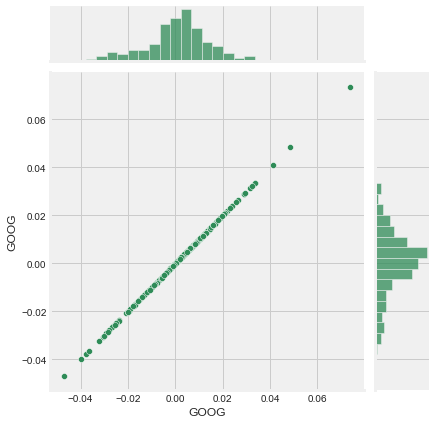

In [14]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

D:\anaconda\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


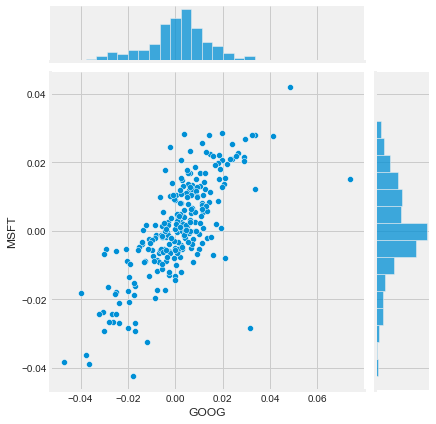

In [15]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

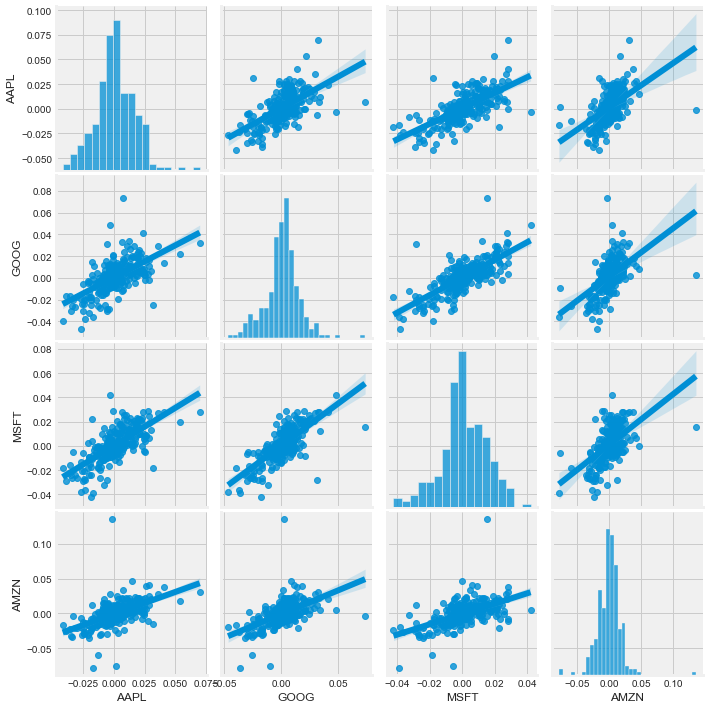

In [16]:
sns.pairplot(tech_rets, kind='reg')

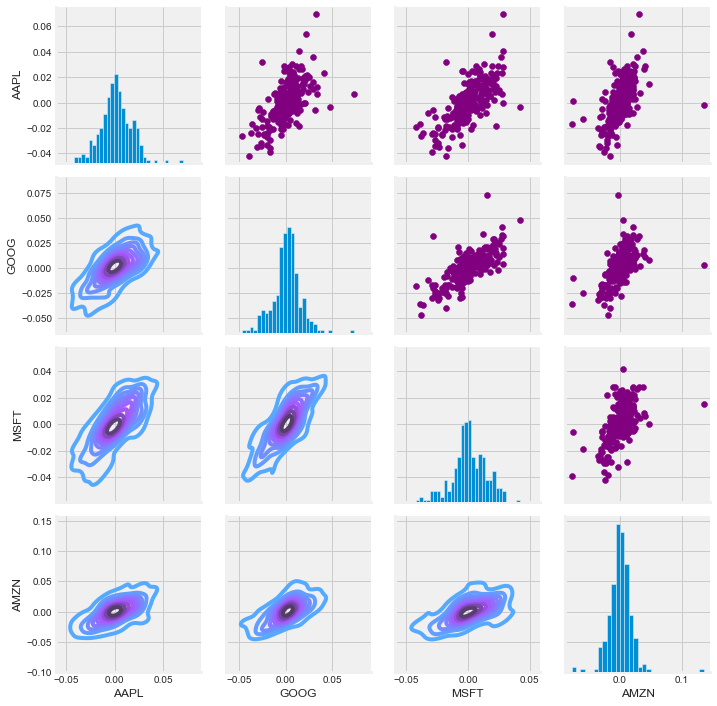

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

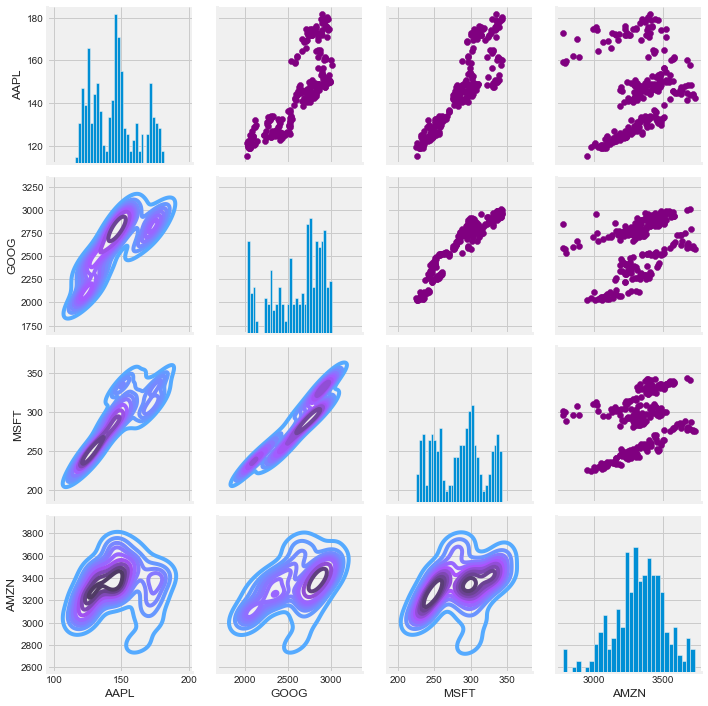

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

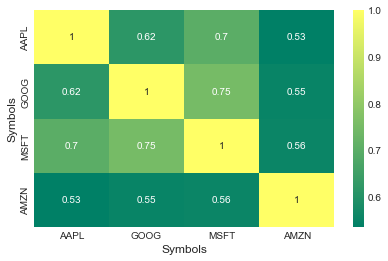

In [19]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

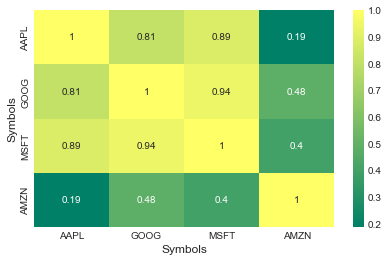

In [20]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

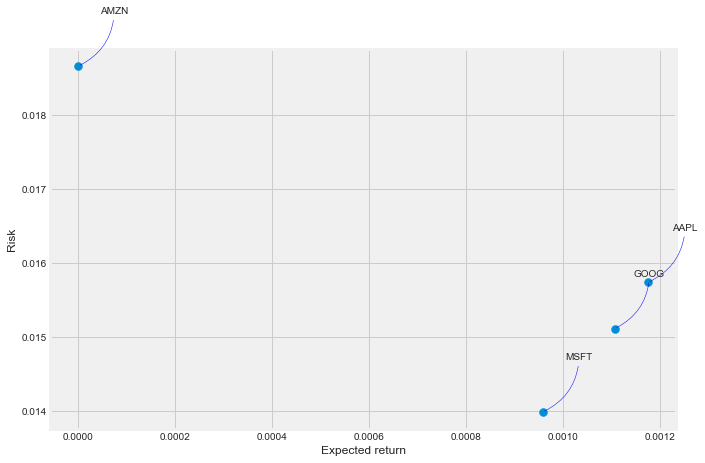

In [21]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [22]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575914
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643498
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783867
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917508
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897019
...,...,...,...,...,...,...
2022-02-09,176.649994,174.899994,176.050003,176.279999,71285000.0,176.279999
2022-02-10,175.479996,171.550003,174.139999,172.119995,90865900.0,172.119995
2022-02-11,173.080002,168.039993,172.330002,168.639999,98566000.0,168.639999


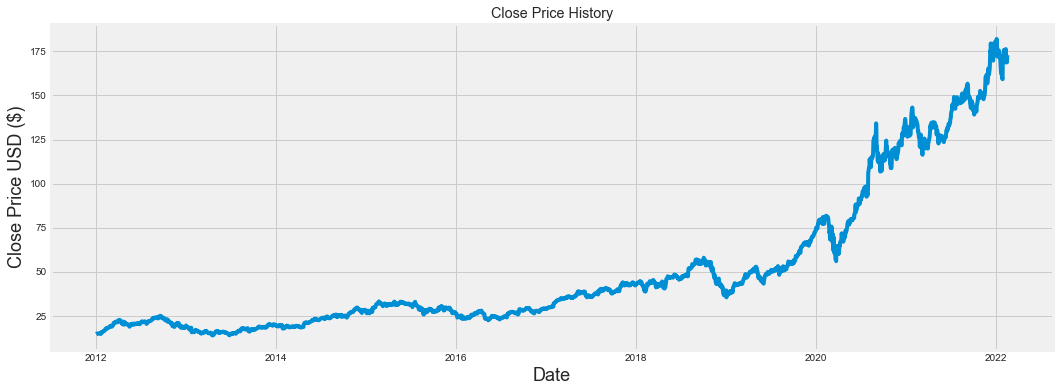

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2421

In [25]:
# Scale the data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(dataset)

# scaled_data

scaler = StandardScaler()
scaler = scaler.fit(dataset)
dataset_scaled = scaler.transform(dataset)

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = dataset_scaled[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([-0.87959679, -0.87765973, -0.87363656, -0.86980622, -0.87039348,
       -0.86906997, -0.86967476, -0.8706915 , -0.87207639, -0.86779026,
       -0.86392487, -0.86511692, -0.8716469 , -0.86541494, -0.87155047,
       -0.8485422 , -0.85032149, -0.84799876, -0.84297639, -0.83993493,
       -0.84018911, -0.84112696, -0.8371301 , -0.83336991, -0.82911006,
       -0.82222949, -0.80777592, -0.8075568 , -0.79951046, -0.79349766,
       -0.80383163, -0.79985232, -0.79993119, -0.78877327, -0.79035977,
       -0.78742349, -0.78214692, -0.7792106 , -0.77075232, -0.76459052,
       -0.76281121, -0.76218887, -0.77272445, -0.77526635, -0.77488943,
       -0.7649849 , -0.76219762, -0.75621108, -0.74209937, -0.72327202,
       -0.72679558, -0.72678683, -0.71317468, -0.70891484, -0.71194759,
       -0.71471732, -0.71760103, -0.70802085, -0.70144702, -0.6986948 ])]
[-0.7054965025513353]

[array([-0.87959679, -0.87765973, -0.87363656, -0.86980622, -0.87039348,
       -0.86906997, -0.86967476, -0.8

In [27]:
print(x_train.shape)
print(y_train.shape)

(2361, 60, 1)
(2361,)


In [29]:

from keras.models import Sequential
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2361/2361 [==============================] - 40s 16ms/step - loss: 0.0091


In [30]:


test_data = dataset_scaled[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

17.39952703107648

C:\Users\duykh\AppData\Local\Temp/ipykernel_11084/3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


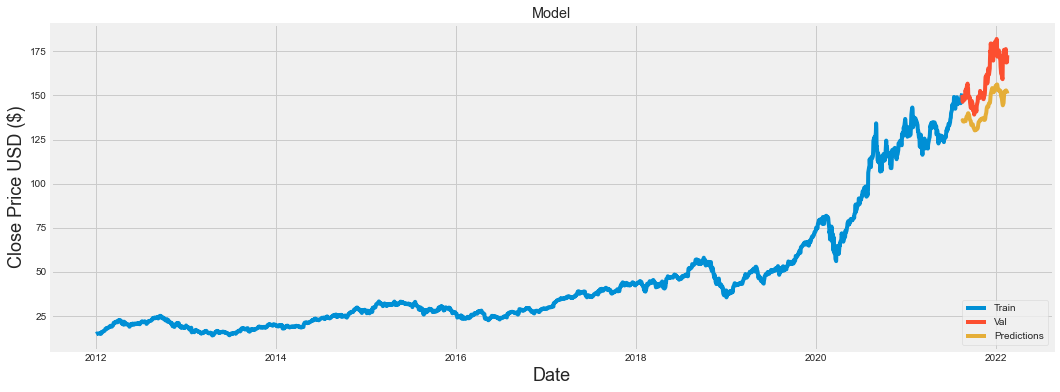

In [31]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
valid

,Close,Predictions
Date,,
2021-08-17,150.190002,135.474792
2021-08-18,146.360001,136.017044
2021-08-19,146.699997,135.724335
2021-08-20,148.190002,135.300446
2021-08-23,149.710007,135.144577
...,...,...
2022-02-09,176.279999,152.376358
2022-02-10,172.119995,152.851547
2022-02-11,168.639999,152.663879
